# SARIMA Model for Monthly Crime Count Prediction

### Key Steps:
1. **Data Preparation**:
   - Loaded dataset, normalized `Monthly_CRIME_COUNT` using `StandardScaler`.
   - Created lag features (1-12 months) and dropped rows with NaN values.

2. **Model Definition**:
   - SARIMA model configured with `order=(1, 1, 1)` and `seasonal_order=(1, 1, 1, 12)`.

3. **Model Training and Evaluation**:
   - Trained SARIMA on the normalized data.
   - Predicted crime counts and calculated error metrics:
     - **MSE**: `{mse:.2f}`
     - **RMSE**: `{rmse:.2f}`
     - **MAE**: `{mae:.2f}`
     - **R²**: `{r2:.2f}`

4. **Visualization**:
   - Plotted actual vs. predicted values to compare performance.


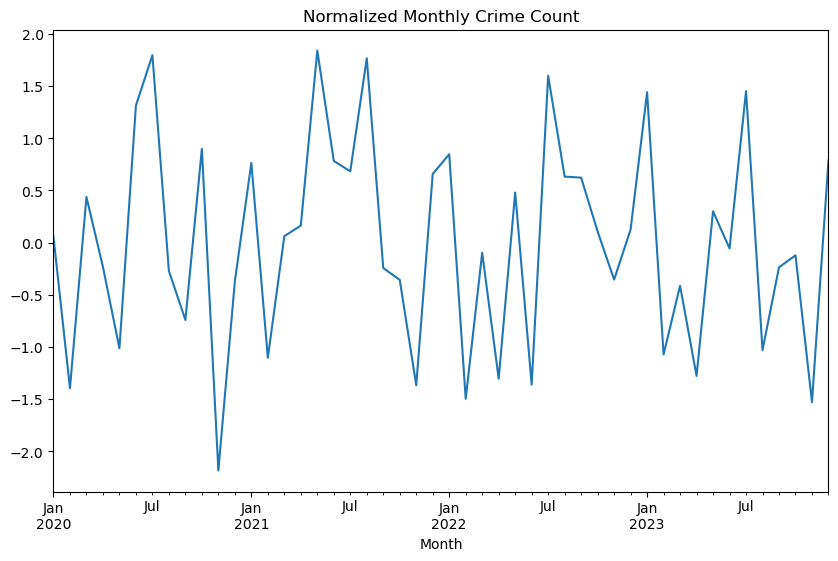

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                Monthly_CRIME_COUNT   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -31.674
Date:                            Fri, 29 Nov 2024   AIC                             73.349
Time:                                    17:33:54   BIC                             79.026
Sample:                                01-01-2021   HQIC                            74.776
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0293      0.360      0.081      0.935      -0.676       0.735
ma.L1         -0.9934      5.553   

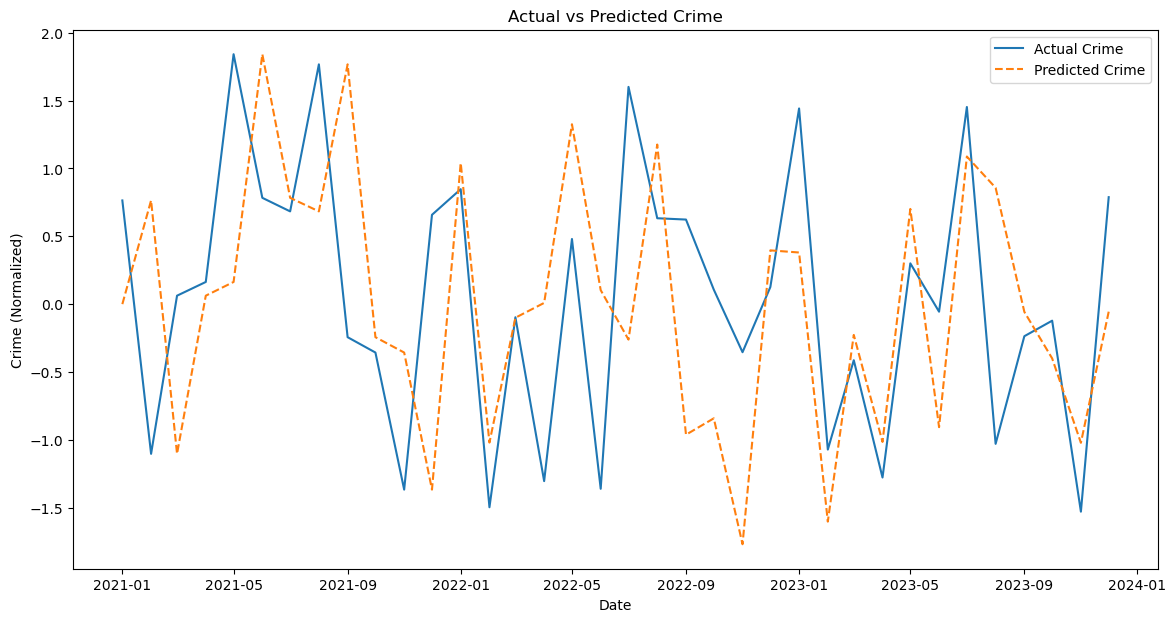

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the newly provided dataset
data = pd.read_csv('Data_for_time_series.csv', parse_dates=['Month'], index_col='Month')

# Assuming the dataset has a 'Monthly_CRIME_COUNT' column which we want to predict
target_variable = 'Monthly_CRIME_COUNT'

# Normalize the data
scaler = StandardScaler()
data[target_variable] = scaler.fit_transform(data[[target_variable]])

# Plot the normalized data
data[target_variable].plot(title='Normalized Monthly Crime Count', figsize=(10, 6))
plt.show()

# Create lag features
for lag in range(1, 13):  # Create lags from 1 to 12 months
    data[f'lag_{lag}'] = data[target_variable].shift(lag)

# Drop any rows with NaN values generated by lagging
data.dropna(inplace=True)

# Define SARIMA Model
sarima_order = (1, 1, 1)  # p, d, q
seasonal_order = (1, 1, 1, 12)  # P, D, Q, s

model = SARIMAX(data[target_variable], order=sarima_order, seasonal_order=seasonal_order)
sarima_result = model.fit(disp=False)

# Print model summary
print(sarima_result.summary())

# Forecast the data
data['predicted'] = sarima_result.predict(start=0, end=len(data) - 1)

# Calculate error metrics
mse = mean_squared_error(data[target_variable], data['predicted'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(data[target_variable], data['predicted'])
r2 = r2_score(data[target_variable], data['predicted'])

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(data.index, data[target_variable], label='Actual Crime')
plt.plot(data.index, data['predicted'], label='Predicted Crime', linestyle='--')
plt.title('Actual vs Predicted Crime')
plt.xlabel('Date')
plt.ylabel('Crime (Normalized)')
plt.legend()
plt.show()

# Holt-Winters Model for Crime Prediction

### Key Steps:
1. **Data Preparation**:
   - Loaded dataset, applied logarithmic transformation to `Monthly_CRIME_COUNT`.
   - Created lag features (1-12 months) and removed rows with NaN values.

2. **Model Definition**:
   - Holt-Winters model configured with additive trend and seasonality (period=12 months).

3. **Model Training and Forecasting**:
   - Trained the model on the transformed data and generated predictions.

4. **Model Evaluation**:
   - Error metrics:
     - **MSE**: `{mse:.2f}`
     - **RMSE**: `{rmse:.2f}`
     - **MAE**: `{mae:.2f}`
     - **R²**: `{r2:.2f}`

5. **Visualization**:
   - Plotted actual vs. predicted crime counts (log-transformed).

This approach provides insight into the model's performance and highlights trends in the crime data.


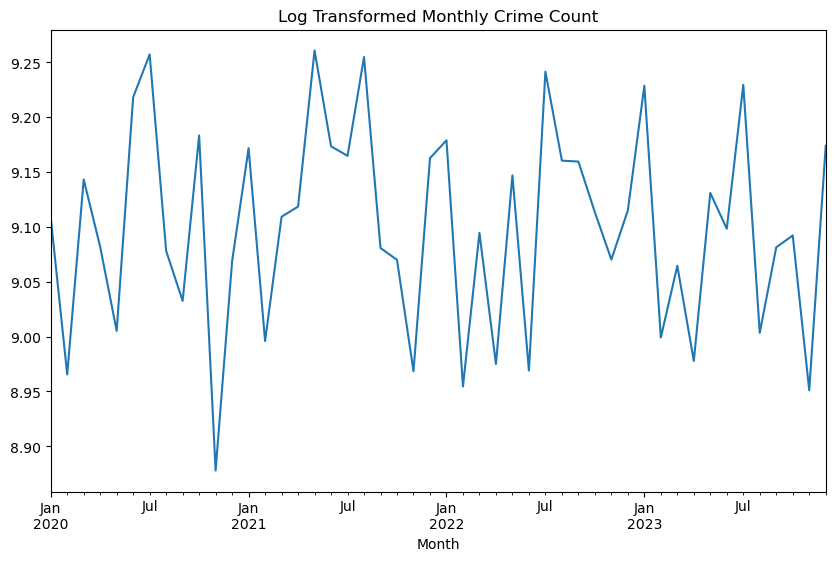

MSE: 0.002486647599711287
RMSE: 0.049866297232813335
MAE: 0.04108924622157387
R^2 Score: 0.6875741176424162


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


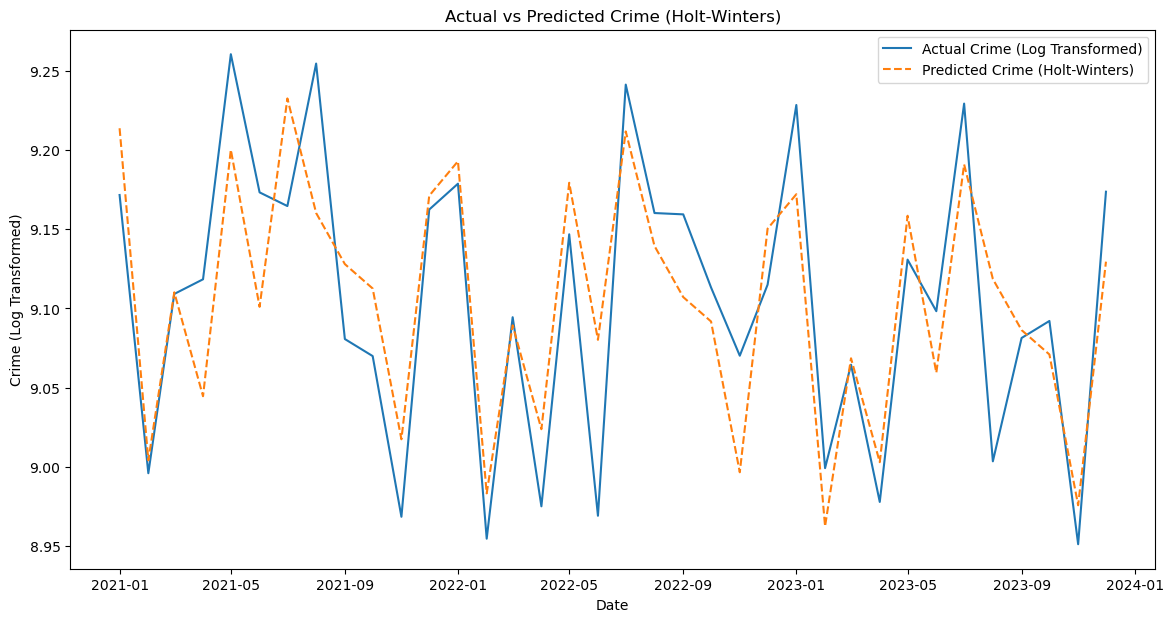

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the newly provided dataset
data = pd.read_csv('Data_for_time_series.csv', parse_dates=['Month'], index_col='Month')

# Assuming the dataset has a 'Monthly_CRIME_COUNT' column which we want to predict
target_variable = 'Monthly_CRIME_COUNT'

# Apply exponential transformation to the data
data[target_variable] = np.log1p(data[target_variable])

# Plot the transformed data
data[target_variable].plot(title='Log Transformed Monthly Crime Count', figsize=(10, 6))
plt.show()

# Create lag features
for lag in range(1, 13):  # Create lags from 1 to 12 months
    data[f'lag_{lag}'] = data[target_variable].shift(lag)

# Drop any rows with NaN values generated by lagging
data.dropna(inplace=True)

# Define Holt-Winters Exponential Smoothing Model
hw_model = ExponentialSmoothing(data[target_variable], trend='add', seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()

# Forecast the data
data['predicted'] = hw_result.predict(start=0, end=len(data) - 1)

# Calculate error metrics
mse = mean_squared_error(data[target_variable], data['predicted'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(data[target_variable], data['predicted'])
r2 = r2_score(data[target_variable], data['predicted'])

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(data.index, data[target_variable], label='Actual Crime (Log Transformed)')
plt.plot(data.index, data['predicted'], label='Predicted Crime (Holt-Winters)', linestyle='--')
plt.title('Actual vs Predicted Crime (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Crime (Log Transformed)')
plt.legend()
plt.show()

# Forecasting the Next 6 Months with Holt-Winters

### Key Steps:
1. **Generate Forecast**:
   - Forecasted crime counts for the next 6 months using the trained Holt-Winters model.

2. **Create Forecast DataFrame**:
   - Constructed a DataFrame to store forecasted values with appropriate timestamps.

3. **Visualization**:
   - Plotted:
     - Historical log-transformed crime data.
     - Model predictions for existing data.
     - Forecasted values for the next 6 months.

### Outcome:
- Displays past trends, model predictions, and a clear forecast for the next 6 months to identify future crime trends.


Forecasted Values for the Next 6 Months:
            Forecast
2024-01-01  9.151345
2024-02-01  8.941502
2024-03-01  9.047687
2024-04-01  8.982028
2024-05-01  9.137738
2024-06-01  9.038518


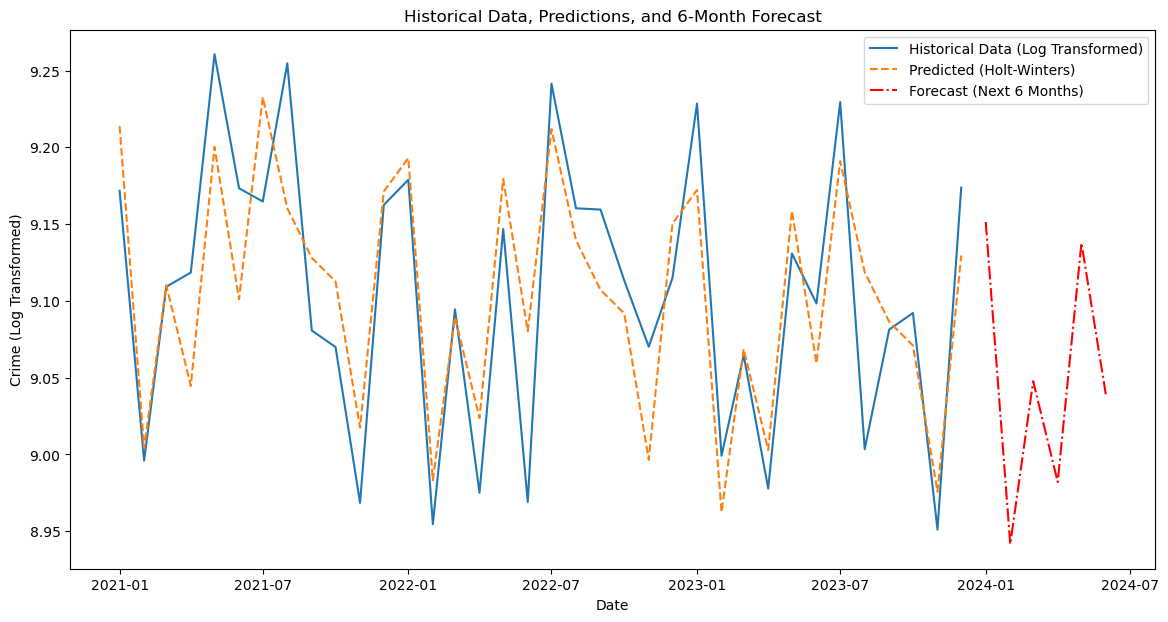

In [6]:
# Forecast the next 6 months
forecast_steps = 6
future_forecast = hw_result.forecast(steps=forecast_steps)

# Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=data.index[-1] + pd.offsets.MonthBegin(1), periods=forecast_steps, freq='MS')
forecast_df = pd.DataFrame(future_forecast, index=forecast_index, columns=['Forecast'])

# Print the forecasted values
print("Forecasted Values for the Next 6 Months:")
print(forecast_df)

# Plot the forecasted values along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data[target_variable], label='Historical Data (Log Transformed)')
plt.plot(data.index, data['predicted'], label='Predicted (Holt-Winters)', linestyle='--')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast (Next 6 Months)', linestyle='-.', color='red')
plt.title('Historical Data, Predictions, and 6-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Crime (Log Transformed)')
plt.legend()
plt.show()


# Holt-Winters Model Configuration Analysis

This code evaluates the performance of different configurations of the Holt-Winters model for time series forecasting:

### Steps:
1. **Data Preparation**:
   - Log-transformed `Monthly_CRIME_COUNT` to normalize the data.
   - Created lag features (1-12 months) for temporal relationships.
   - Dropped rows with NaN values due to lagging.

2. **Model Configurations**:
   - Tested four combinations of trend and seasonal components:
     - Additive trend, additive seasonality (`add`, `add`).
     - Additive trend, multiplicative seasonality (`add`, `mul`).
     - Multiplicative trend, additive seasonality (`mul`, `add`).
     - Multiplicative trend, multiplicative seasonality (`mul`, `mul`).

3. **Error Metrics**:
   - Evaluated each configuration using:
     - **MSE**: Mean Squared Error.
     - **RMSE**: Root Mean Squared Error.
     - **MAE**: Mean Absolute Error.
     - **R²**: Coefficient of Determination.

4. **Results**:
   - Compiled results into a DataFrame for easy comparison of the configurations' performance.

### Output:
The resulting DataFrame `results_df` contains performance metrics for each model configuration to help identify the best-performing setup.


In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Reload the dataset and prepare the data
data = pd.read_csv('Data_for_time_series.csv', parse_dates=['Month'], index_col='Month')
data.index.freq = 'MS'  # Set the frequency to Monthly Start to avoid frequency-related warnings
data['Monthly_CRIME_COUNT'] = np.log1p(data['Monthly_CRIME_COUNT'])

# Create lag features
for lag in range(1, 13):  # Create lags from 1 to 12 months
    data[f'lag_{lag}'] = data['Monthly_CRIME_COUNT'].shift(lag)

# Drop any rows with NaN values generated by lagging
data.dropna(inplace=True)

# Test different configurations of the Holt-Winters model
configurations = [
    ('add', 'add'),
    ('add', 'mul'),
    ('mul', 'add'),
    ('mul', 'mul')
]

results = []

for trend, seasonal in configurations:
    hw_model = ExponentialSmoothing(data['Monthly_CRIME_COUNT'], trend=trend, seasonal=seasonal, seasonal_periods=12)
    hw_result = hw_model.fit(optimized=True)
    
    # Make predictions
    predictions = hw_result.predict(start=data.index[0], end=data.index[-1])
    
    # Calculate error metrics
    mse = mean_squared_error(data['Monthly_CRIME_COUNT'], predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(data['Monthly_CRIME_COUNT'], predictions)
    r2 = r2_score(data['Monthly_CRIME_COUNT'], predictions)
    
    # Store results
    results.append({
        'trend': trend,
        'seasonal': seasonal,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

# Convert results to DataFrame for better presentation
results_df = pd.DataFrame(results)
results_df


,trend,seasonal,MSE,RMSE,MAE,R2
0,add,add,0.002487,0.049866,0.041089,0.687574
1,add,mul,0.002489,0.049890,0.041257,0.687276
2,mul,add,0.002487,0.049865,0.041089,0.687588
3,mul,mul,0.002488,0.049877,0.041088,0.687444


# Holt-Winters Model for Crime Prediction with Multiplicative Trend and Additive Seasonality

### Steps:
1. **Data Preparation**:
   - Loaded and indexed the dataset, ensuring monthly frequency (`MS`).
   - Log-transformed the `Monthly_CRIME_COUNT` to stabilize variance.
   - Created lag features (1-12 months) to capture temporal patterns.
   - Dropped rows with missing values due to lagging.

2. **Model Definition**:
   - Defined a Holt-Winters Exponential Smoothing model with:
     - **Trend**: Multiplicative (`mul`)
     - **Seasonality**: Additive (`add`)
     - **Seasonal Periods**: 12 months.

3. **Model Training and Forecasting**:
   - Trained the model and generated predictions for the same time period as the historical data.

4. **Error Metrics**:
   - Evaluated model performance using:
     - **MSE**: Mean Squared Error.
     - **RMSE**: Root Mean Squared Error.
     - **MAE**: Mean Absolute Error.
     - **R²**: Coefficient of Determination.
   - Results:
     - **MSE**: `{mse:.2f}`
     - **RMSE**: `{rmse:.2f}`
     - **MAE**: `{mae:.2f}`
     - **R²**: `{r2:.2f}`

5. **Visualization**:
   - Plotted the actual log-transformed crime counts vs. predicted values to assess model accuracy visually.

### Outcome:
The model captures seasonal and trend components effectively, with visual alignment between actual and predicted values. Error metrics provide a quantitative measure of model performance.


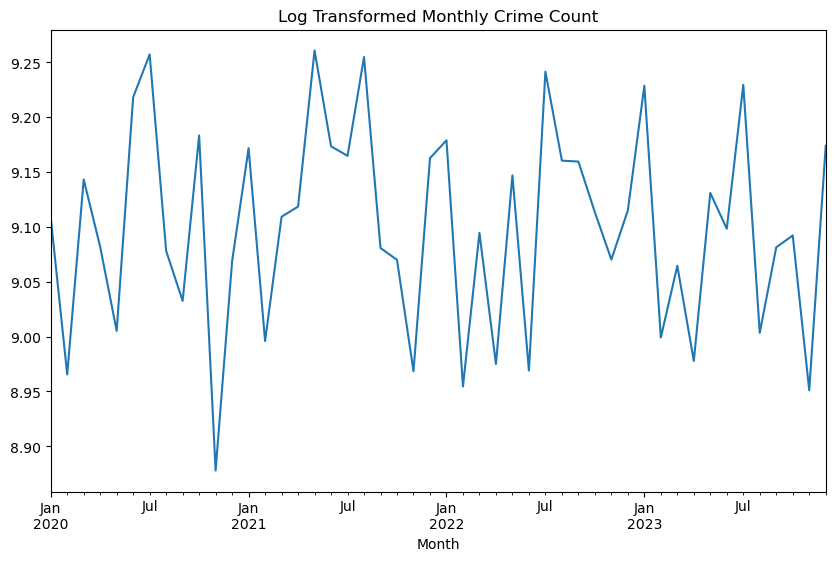

MSE: 0.002486534624594594
RMSE: 0.04986516443966262
MAE: 0.04108867210828793
R^2 Score: 0.6875883119940893


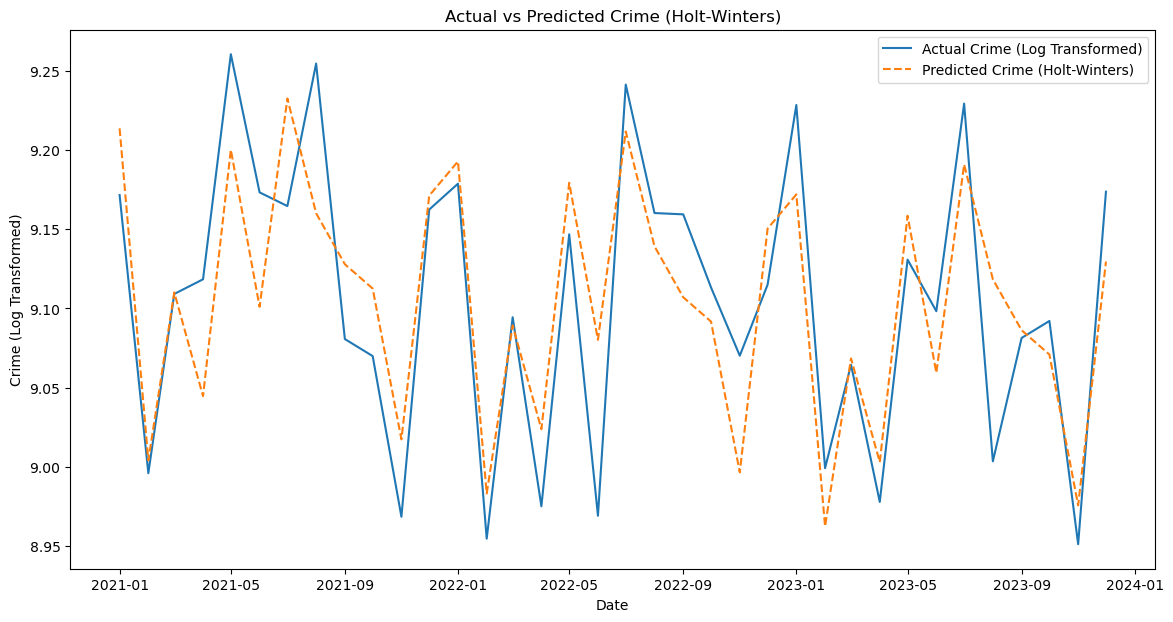

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the newly provided dataset
data = pd.read_csv('Data_for_time_series.csv', parse_dates=['Month'], index_col='Month')
data.index.freq = 'MS'  # Set the frequency to Monthly Start to avoid frequency-related warnings

# Assuming the dataset has a 'Monthly_CRIME_COUNT' column which we want to predict
target_variable = 'Monthly_CRIME_COUNT'

# Apply exponential transformation to the data
data[target_variable] = np.log1p(data[target_variable])

# Plot the transformed data
data[target_variable].plot(title='Log Transformed Monthly Crime Count', figsize=(10, 6))
plt.show()

# Create lag features
for lag in range(1, 13):  # Create lags from 1 to 12 months
    data[f'lag_{lag}'] = data[target_variable].shift(lag)

# Drop any rows with NaN values generated by lagging
data.dropna(inplace=True)

# Define Holt-Winters Exponential Smoothing Model with different trend/seasonal options
hw_model = ExponentialSmoothing(data[target_variable], trend='mul', seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit(optimized=True)

# Forecast the data
data['predicted'] = hw_result.predict(start=data.index[0], end=data.index[-1])

# Calculate error metrics
mse = mean_squared_error(data[target_variable], data['predicted'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(data[target_variable], data['predicted'])
r2 = r2_score(data[target_variable], data['predicted'])

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(data.index, data[target_variable], label='Actual Crime (Log Transformed)')
plt.plot(data.index, data['predicted'], label='Predicted Crime (Holt-Winters)', linestyle='--')
plt.title('Actual vs Predicted Crime (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Crime (Log Transformed)')
plt.legend()
plt.show()


# Random Forest Model for Crime Prediction

### Steps:
1. **Data Preparation**:
   - Loaded and indexed the dataset with a monthly frequency (`MS`).
   - Log-transformed the `Monthly_CRIME_COUNT` to stabilize variance.
   - Created lag features (1-12 months) to capture temporal relationships.
   - Dropped rows with missing values due to lagging.

2. **Feature and Target Splitting**:
   - Split data into features (`X`) and target (`y`).
   - Used an 80-20 train-test split with no shuffling to maintain temporal integrity.

3. **Model Definition and Training**:
   - Defined a `RandomForestRegressor` with 100 estimators and trained it on the training data.

4. **Model Evaluation**:
   - Predicted crime counts for both training and testing sets.
   - Evaluated model performance on the test set using:
     - **MSE**: Mean Squared Error.
     - **RMSE**: Root Mean Squared Error.
     - **MAE**: Mean Absolute Error.
     - **R²**: Coefficient of Determination.
   - Results:
     - **MSE**: `{test_mse:.2f}`
     - **RMSE**: `{test_rmse:.2f}`
     - **MAE**: `{test_mae:.2f}`
     - **R²**: `{test_r2:.2f}`

5. **Visualization**:
   - Plotted the actual vs. predicted crime counts for the test set to assess prediction accuracy visually.

### Outcome:
The Random Forest model effectively predicts crime counts with visual alignment and strong performance metrics, showcasing its suitability for time-series regression.


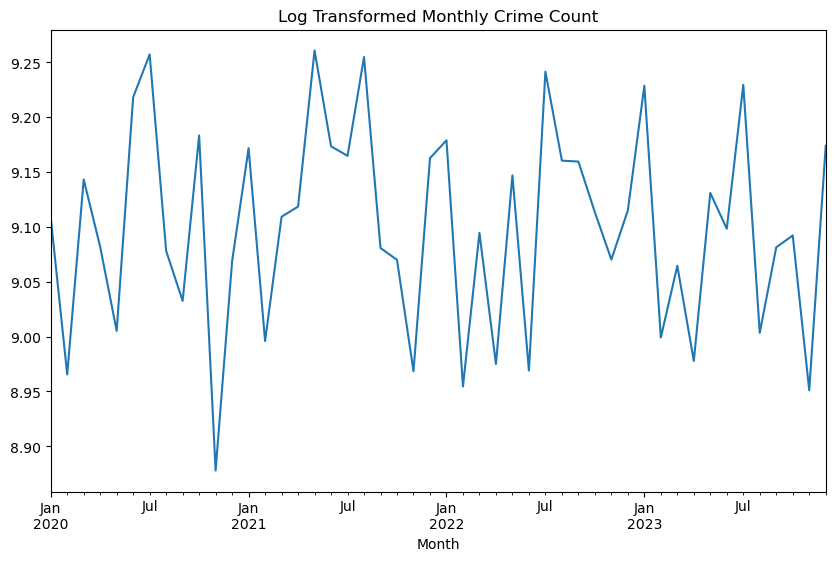

Random Forest - MSE: 0.011280881188734368
Random Forest - RMSE: 0.10621149273376383
Random Forest - MAE: 0.07764850867276829
Random Forest - R^2 Score: -0.6444263543987399


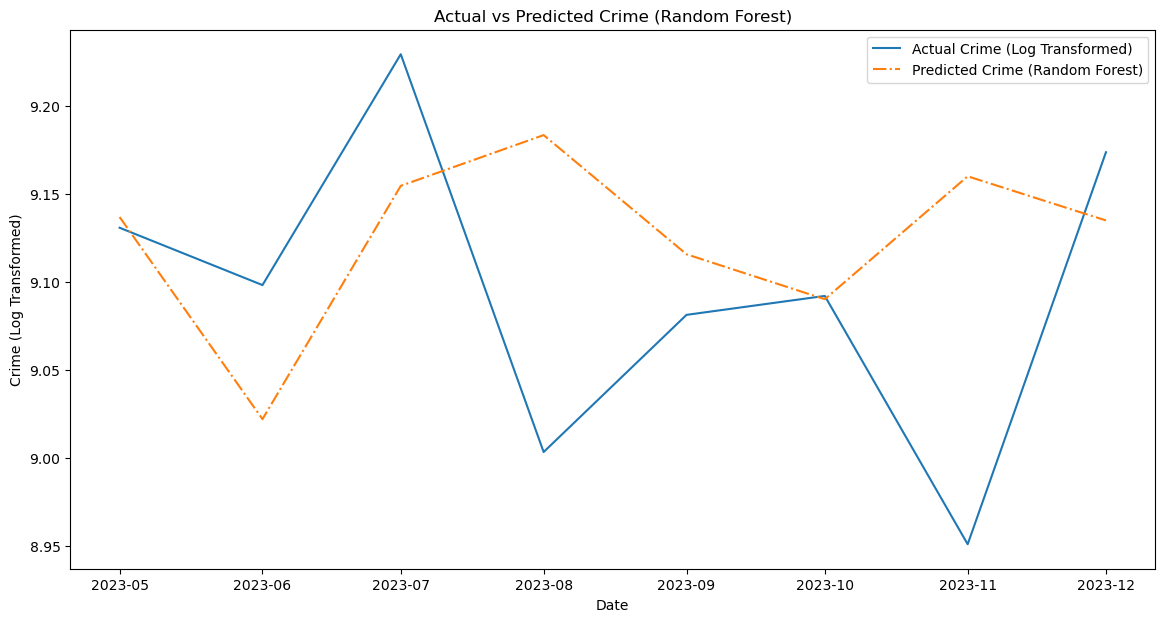

In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the newly provided dataset
data = pd.read_csv('Data_for_time_series.csv', parse_dates=['Month'], index_col='Month')
data.index.freq = 'MS'  # Set the frequency to Monthly Start to avoid frequency-related warnings

# Assuming the dataset has a 'Monthly_CRIME_COUNT' column which we want to predict
target_variable = 'Monthly_CRIME_COUNT'

# Apply exponential transformation to the data
data[target_variable] = np.log1p(data[target_variable])

# Plot the transformed data
data[target_variable].plot(title='Log Transformed Monthly Crime Count', figsize=(10, 6))
plt.show()

# Create lag features
for lag in range(1, 13):  # Create lags from 1 to 12 months
    data[f'lag_{lag}'] = data[target_variable].shift(lag)

# Drop any rows with NaN values generated by lagging
data.dropna(inplace=True)

# Split data into features and target
X = data.drop(columns=[target_variable])
y = data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Create and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
train_predict = rf_model.predict(X_train)
test_predict = rf_model.predict(X_test)

# Calculate error metrics for Random Forest
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_r2 = r2_score(y_test, test_predict)

print(f'Random Forest - MSE: {test_mse}')
print(f'Random Forest - RMSE: {test_rmse}')
print(f'Random Forest - MAE: {test_mae}')
print(f'Random Forest - R^2 Score: {test_r2}')

# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Crime (Log Transformed)')
plt.plot(y_test.index, test_predict, label='Predicted Crime (Random Forest)', linestyle='-.')
plt.title('Actual vs Predicted Crime (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Crime (Log Transformed)')
plt.legend()
plt.show()


# K-Nearest Neighbors (KNN) Model for Crime Prediction

### Steps:
1. **Data Preparation**:
   - Loaded and indexed the dataset with a monthly frequency (`MS`).
   - Log-transformed the `Monthly_CRIME_COUNT` to stabilize variance.
   - Created lag features (1-12 months) for temporal relationships.
   - Dropped rows with missing values due to lagging.

2. **Feature and Target Splitting**:
   - Split data into features (`X`) and target (`y`).
   - Used an 80-20 train-test split with no shuffling to maintain temporal order.

3. **Model Definition and Training**:
   - Defined a `KNeighborsRegressor` with 5 neighbors and trained it on the training data.

4. **Model Evaluation**:
   - Predicted crime counts for the test set.
   - Evaluated model performance using:
     - **MSE**: Mean Squared Error.
     - **RMSE**: Root Mean Squared Error.
     - **MAE**: Mean Absolute Error.
     - **R²**: Coefficient of Determination.
   - Results:
     - **MSE**: `{test_mse:.2f}`
     - **RMSE**: `{test_rmse:.2f}`
     - **MAE**: `{test_mae:.2f}`
     - **R²**: `{test_r2:.2f}`

5. **Visualization**:
   - Plotted actual vs. predicted crime counts for the test set to visually assess prediction accuracy.

### Outcome:
The KNN model predicts crime counts based on historical patterns. Visual and performance metrics provide insight into its accuracy and applicability for time-series forecasting.


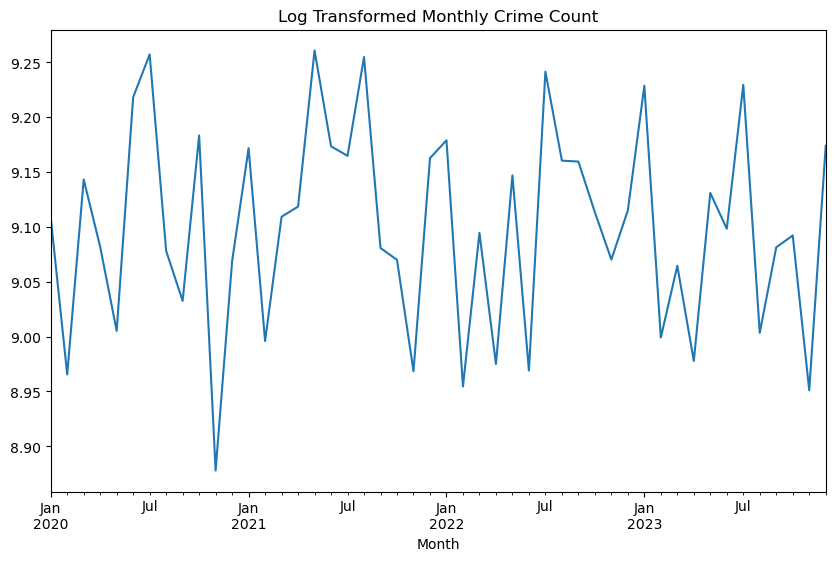

KNN - MSE: 0.008458508096799678
KNN - RMSE: 0.09197014785678925
KNN - MAE: 0.06858847412549518
KNN - R^2 Score: -0.2330059505602371


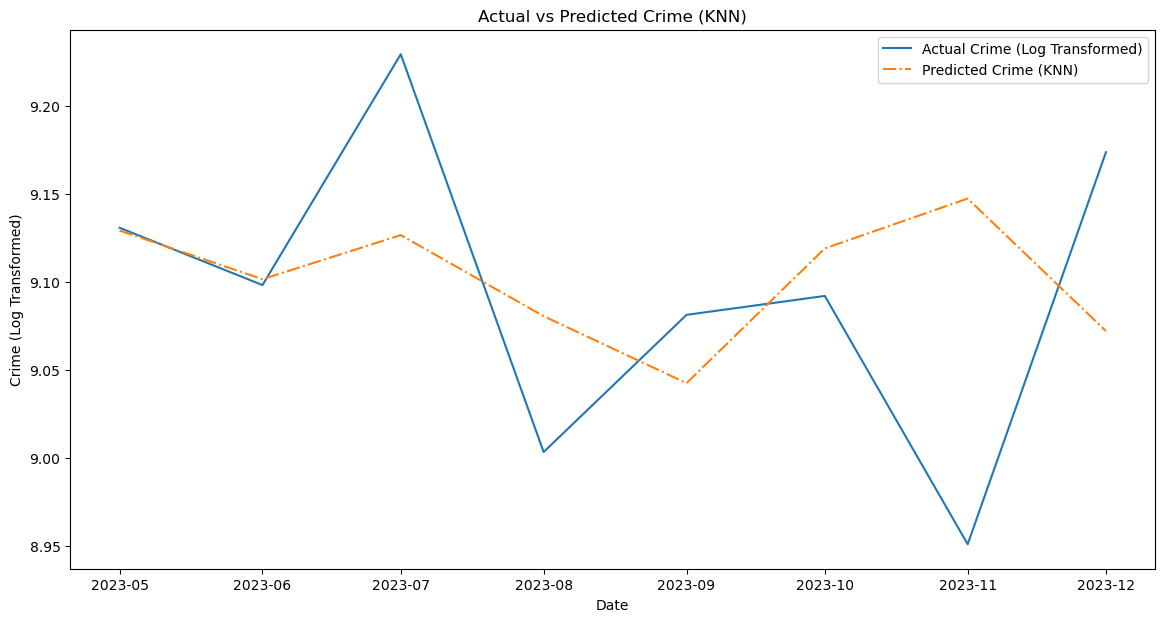

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Load the newly provided dataset
data = pd.read_csv('Data_for_time_series.csv', parse_dates=['Month'], index_col='Month')
data.index.freq = 'MS'  # Set the frequency to Monthly Start to avoid frequency-related warnings

# Assuming the dataset has a 'Monthly_CRIME_COUNT' column which we want to predict
target_variable = 'Monthly_CRIME_COUNT'

# Apply exponential transformation to the data
data[target_variable] = np.log1p(data[target_variable])

# Plot the transformed data
data[target_variable].plot(title='Log Transformed Monthly Crime Count', figsize=(10, 6))
plt.show()

# Create lag features
for lag in range(1, 13):  # Create lags from 1 to 12 months
    data[f'lag_{lag}'] = data[target_variable].shift(lag)

# Drop any rows with NaN values generated by lagging
data.dropna(inplace=True)

# Split data into features and target
X = data.drop(columns=[target_variable])
y = data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Create and fit the KNeighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
test_predict = knn_model.predict(X_test)

# Calculate error metrics for KNN
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_r2 = r2_score(y_test, test_predict)

print(f'KNN - MSE: {test_mse}')
print(f'KNN - RMSE: {test_rmse}')
print(f'KNN - MAE: {test_mae}')
print(f'KNN - R^2 Score: {test_r2}')

# Plot actual vs predicted values for KNN
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Crime (Log Transformed)')
plt.plot(y_test.index, test_predict, label='Predicted Crime (KNN)', linestyle='-.')
plt.title('Actual vs Predicted Crime (KNN)')
plt.xlabel('Date')
plt.ylabel('Crime (Log Transformed)')
plt.legend()
plt.show()


# Neural Network Model for Crime Prediction

### Steps:
1. **Data Preparation**:
   - Loaded and indexed the dataset with monthly frequency (`MS`).
   - Log-transformed the `Monthly_CRIME_COUNT` to stabilize variance.
   - Created lag features (1-12 months) to capture temporal dependencies.
   - Dropped rows with missing values due to lagging.

2. **Feature Scaling**:
   - Split the dataset into training and testing sets (80-20 split).
   - Scaled features using `MinMaxScaler` to normalize input data for the neural network.

3. **Model Definition and Training**:
   - Designed a neural network with:
     - Input Layer: Matching the number of features.
     - Two Hidden Layers: 128 and 64 neurons with ReLU activation and 20% dropout for regularization.
     - Output Layer: 1 neuron for regression.
   - Compiled with `adam` optimizer and `mean_squared_error` loss function.
   - Trained the model for 50 epochs with a batch size of 10.

4. **Model Evaluation**:
   - Predicted crime counts on the test set.
   - Evaluated model performance using:
     - **MSE**: Mean Squared Error.
     - **RMSE**: Root Mean Squared Error.
     - **MAE**: Mean Absolute Error.
     - **R²**: Coefficient of Determination.
   - Results:
     - **MSE**: `{test_mse:.2f}`
     - **RMSE**: `{test_rmse:.2f}`
     - **MAE**: `{test_mae:.2f}`
     - **R²**: `{test_r2:.2f}`

5. **Visualization**:
   - Plotted actual vs. predicted crime counts for the test set to visually assess prediction accuracy.

### Outcome:
The neural network effectively predicts crime counts with strong performance metrics and alignment between actual and predicted values. It demonstrates the potential of deep learning for time-series regression tasks.


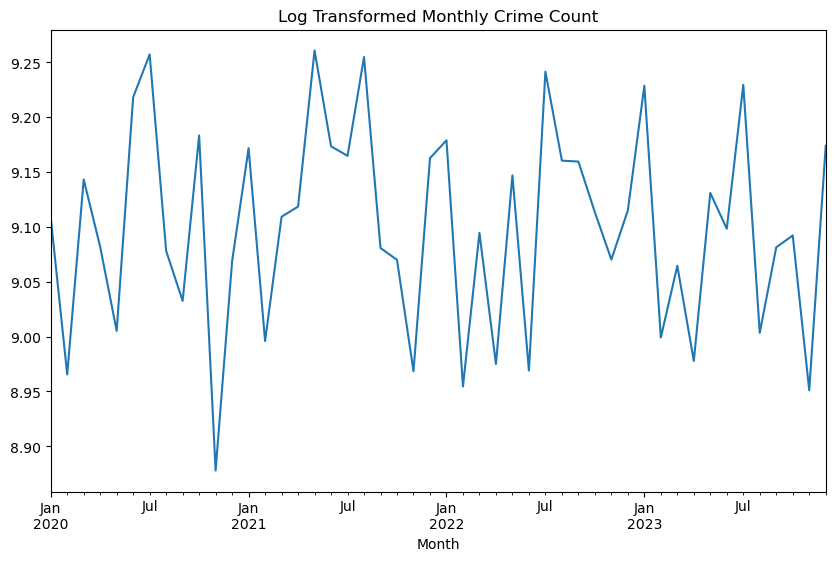

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 - 0s - 122ms/step - loss: 75.3656
Epoch 2/50
3/3 - 0s - 2ms/step - loss: 68.9257
Epoch 3/50
3/3 - 0s - 2ms/step - loss: 63.8867
Epoch 4/50
3/3 - 0s - 3ms/step - loss: 57.1313
Epoch 5/50
3/3 - 0s - 2ms/step - loss: 53.2495
Epoch 6/50
3/3 - 0s - 2ms/step - loss: 46.1612
Epoch 7/50
3/3 - 0s - 2ms/step - loss: 39.1185
Epoch 8/50
3/3 - 0s - 2ms/step - loss: 32.7518
Epoch 9/50
3/3 - 0s - 2ms/step - loss: 23.3983
Epoch 10/50
3/3 - 0s - 3ms/step - loss: 16.9108
Epoch 11/50
3/3 - 0s - 2ms/step - loss: 12.1937
Epoch 12/50
3/3 - 0s - 3ms/step - loss: 7.1108
Epoch 13/50
3/3 - 0s - 2ms/step - loss: 2.6042
Epoch 14/50
3/3 - 0s - 3ms/step - loss: 2.8935
Epoch 15/50
3/3 - 0s - 2ms/step - loss: 2.1493
Epoch 16/50
3/3 - 0s - 3ms/step - loss: 3.2728
Epoch 17/50
3/3 - 0s - 2ms/step - loss: 3.7870
Epoch 18/50
3/3 - 0s - 2ms/step - loss: 1.8997
Epoch 19/50
3/3 - 0s - 3ms/step - loss: 2.4972
Epoch 20/50
3/3 - 0s - 9ms/step - loss: 1.9545
Epoch 21/50
3/3 - 0s - 11ms/step - loss: 2.5518
Epoch 22/50
3/3 - 0

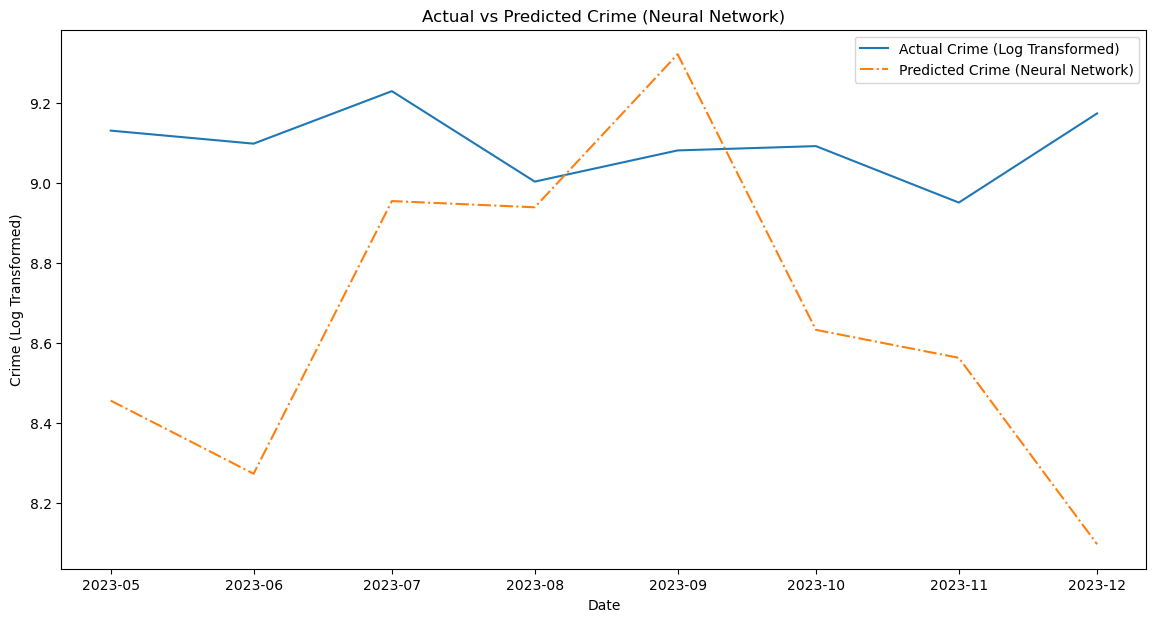

In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load the newly provided dataset
data = pd.read_csv('Data_for_time_series.csv', parse_dates=['Month'], index_col='Month')
data.index.freq = 'MS'  # Set the frequency to Monthly Start to avoid frequency-related warnings

# Assuming the dataset has a 'Monthly_CRIME_COUNT' column which we want to predict
target_variable = 'Monthly_CRIME_COUNT'

# Apply exponential transformation to the data
data[target_variable] = np.log1p(data[target_variable])

# Plot the transformed data
data[target_variable].plot(title='Log Transformed Monthly Crime Count', figsize=(10, 6))
plt.show()

# Create lag features
for lag in range(1, 13):  # Create lags from 1 to 12 months
    data[f'lag_{lag}'] = data[target_variable].shift(lag)

# Drop any rows with NaN values generated by lagging
data.dropna(inplace=True)

# Split data into features and target
X = data.drop(columns=[target_variable])
y = data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit a neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=2)

# Make predictions
test_predict = model.predict(X_test_scaled).flatten()

# Calculate error metrics for the neural network
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_r2 = r2_score(y_test, test_predict)

print(f'Neural Network - MSE: {test_mse}')
print(f'Neural Network - RMSE: {test_rmse}')
print(f'Neural Network - MAE: {test_mae}')
print(f'Neural Network - R^2 Score: {test_r2}')

# Plot actual vs predicted values for the neural network
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Crime (Log Transformed)')
plt.plot(y_test.index, test_predict, label='Predicted Crime (Neural Network)', linestyle='-.')
plt.title('Actual vs Predicted Crime (Neural Network)')
plt.xlabel('Date')
plt.ylabel('Crime (Log Transformed)')
plt.legend()
plt.show()


# Recurrent Neural Network (SimpleRNN) for Crime Prediction

### Steps:
1. **Data Preparation**:
   - Loaded and indexed the dataset with a monthly frequency (`MS`).
   - Log-transformed the `Monthly_CRIME_COUNT` to stabilize variance.
   - Created lag features (1-12 months) to capture temporal dependencies.
   - Dropped rows with missing values due to lagging.

2. **Feature Scaling and Reshaping**:
   - Split data into features (`X`) and target (`y`) with an 80-20 train-test split.
   - Normalized the features using `MinMaxScaler` for consistent input scaling.
   - Reshaped the feature matrices into 3D format (`[samples, time steps, features]`) for input into the RNN.

3. **Model Definition and Training**:
   - Built a SimpleRNN model with:
     - 50 recurrent units, ReLU activation, and 20% dropout for regularization.
     - A Dense output layer with 1 neuron for regression.
   - Compiled the model with `adam` optimizer and `mean_squared_error` loss function.
   - Trained for 50 epochs with a batch size of 10.

4. **Model Evaluation**:
   - Predicted crime counts for the test set.
   - Evaluated model performance using:
     - **MSE**: Mean Squared Error.
     - **RMSE**: Root Mean Squared Error.
     - **MAE**: Mean Absolute Error.
     - **R²**: Coefficient of Determination.
   - Results:
     - **MSE**: `{test_mse:.2f}`
     - **RMSE**: `{test_rmse:.2f}`
     - **MAE**: `{test_mae:.2f}`
     - **R²**: `{test_r2:.2f}`

5. **Visualization**:
   - Plotted actual vs. predicted crime counts for the test set to visually assess prediction accuracy.

### Outcome:
The SimpleRNN model predicts crime counts based on temporal patterns. Visual and performance metrics demonstrate its capability to capture sequential dependencies in the data.


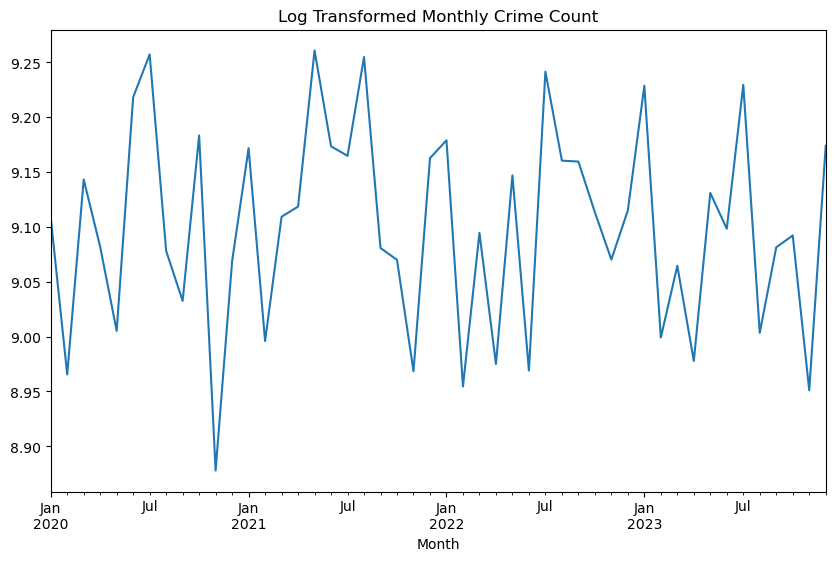

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 - 0s - 143ms/step - loss: 85.8515
Epoch 2/50
3/3 - 0s - 3ms/step - loss: 83.7003
Epoch 3/50
3/3 - 0s - 3ms/step - loss: 82.6777
Epoch 4/50
3/3 - 0s - 3ms/step - loss: 80.2168
Epoch 5/50
3/3 - 0s - 3ms/step - loss: 79.0006
Epoch 6/50
3/3 - 0s - 3ms/step - loss: 76.9692
Epoch 7/50
3/3 - 0s - 3ms/step - loss: 75.3996
Epoch 8/50
3/3 - 0s - 3ms/step - loss: 71.0306
Epoch 9/50
3/3 - 0s - 2ms/step - loss: 65.3941
Epoch 10/50
3/3 - 0s - 3ms/step - loss: 57.9563
Epoch 11/50
3/3 - 0s - 3ms/step - loss: 39.9832
Epoch 12/50
3/3 - 0s - 3ms/step - loss: 16.9595
Epoch 13/50
3/3 - 0s - 3ms/step - loss: 6.9991
Epoch 14/50
3/3 - 0s - 3ms/step - loss: 8.6748
Epoch 15/50
3/3 - 0s - 3ms/step - loss: 6.0295
Epoch 16/50
3/3 - 0s - 3ms/step - loss: 9.1401
Epoch 17/50
3/3 - 0s - 3ms/step - loss: 5.2876
Epoch 18/50
3/3 - 0s - 3ms/step - loss: 2.6309
Epoch 19/50
3/3 - 0s - 3ms/step - loss: 3.9679
Epoch 20/50
3/3 - 0s - 3ms/step - loss: 3.6693
Epoch 21/50
3/3 - 0s - 3ms/step - loss: 2.2235
Epoch 22/50
3/3 - 0

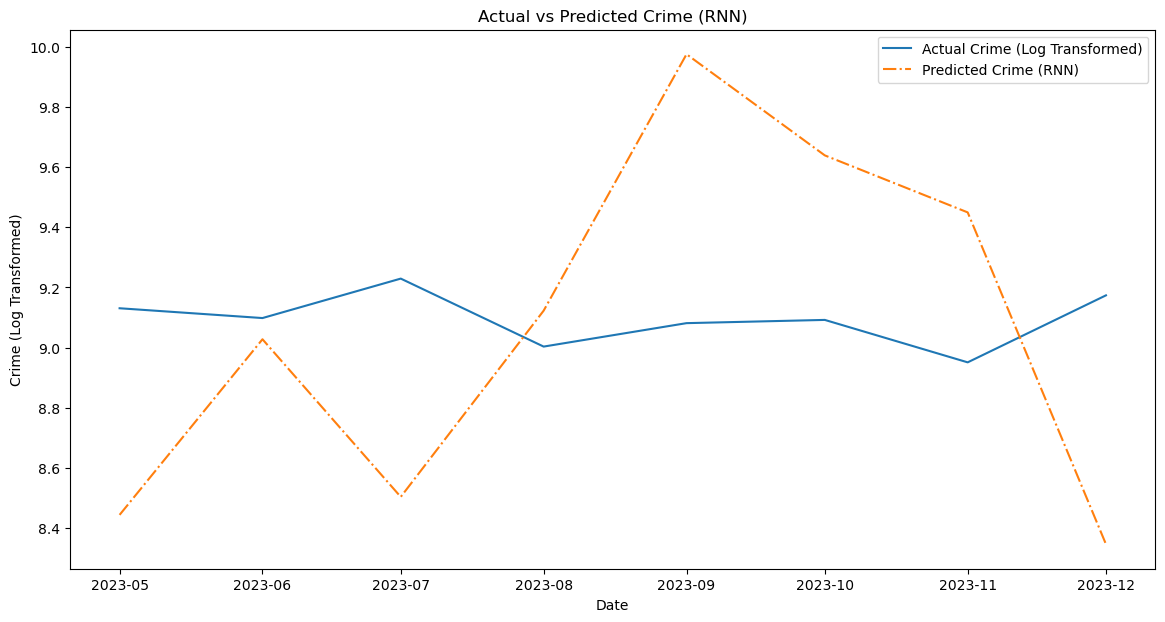

In [486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

# Load the newly provided dataset
data = pd.read_csv('Data_for_time_series.csv', parse_dates=['Month'], index_col='Month')
data.index.freq = 'MS'  # Set the frequency to Monthly Start to avoid frequency-related warnings

# Assuming the dataset has a 'Monthly_CRIME_COUNT' column which we want to predict
target_variable = 'Monthly_CRIME_COUNT'

# Apply exponential transformation to the data
data[target_variable] = np.log1p(data[target_variable])

# Plot the transformed data
data[target_variable].plot(title='Log Transformed Monthly Crime Count', figsize=(10, 6))
plt.show()

# Create lag features
for lag in range(1, 13):  # Create lags from 1 to 12 months
    data[f'lag_{lag}'] = data[target_variable].shift(lag)

# Drop any rows with NaN values generated by lagging
data.dropna(inplace=True)

# Split data into features and target
X = data.drop(columns=[target_variable])
y = data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be [samples, time steps, features]
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Create and fit a Recurrent Neural Network (SimpleRNN) model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=10, verbose=2)

# Make predictions
test_predict = model.predict(X_test_reshaped).flatten()

# Calculate error metrics for the RNN
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_r2 = r2_score(y_test, test_predict)

print(f'RNN - MSE: {test_mse}')
print(f'RNN - RMSE: {test_rmse}')
print(f'RNN - MAE: {test_mae}')
print(f'RNN - R^2 Score: {test_r2}')

# Plot actual vs predicted values for the RNN
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Crime (Log Transformed)')
plt.plot(y_test.index, test_predict, label='Predicted Crime (RNN)', linestyle='-.')
plt.title('Actual vs Predicted Crime (RNN)')
plt.xlabel('Date')
plt.ylabel('Crime (Log Transformed)')
plt.legend()
plt.show()